In [1]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.6


In [3]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    obs = pm.Normal('obs', mu=mu, sd=1, observed=np.random.randn(100))

    trace = pm.sample(1000, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:04<00:00, 1434.55draws/s]
The acceptance probability does not match the target. It is 0.8791508186304104, but should be close to 0.8. Try to increase the number of tuning steps.


In [26]:
print(trace, trace['mu'].shape)

<MultiTrace: 4 chains, 1000 iterations, 1 variables> (4000,)


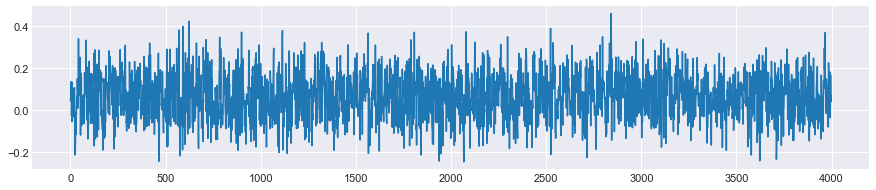

In [15]:
_ = plt.plot(np.arange(len(trace['mu'])),trace['mu'], figure = plt.figure(figsize = [15,3]))

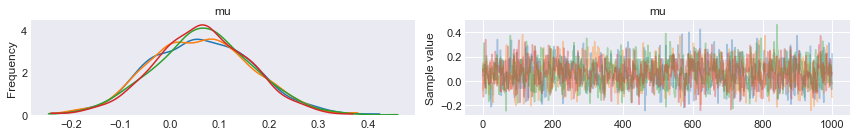

In [7]:
_ = pm.plots.traceplot(trace=trace, varnames=["mu"])

In [17]:
with pm.Model() as model2:
    mu = pm.Normal('mu', mu=0, sd=1)
    obs = pm.Normal('obs', mu=mu, sd=1, observed=np.random.randn(100))

    trace2 = pm.sample(1000, tune=500, chains = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu]
100%|██████████| 1500/1500 [00:00<00:00, 3052.88it/s]
The acceptance probability does not match the target. It is 0.8800147131299093, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [25]:
print(trace2, trace2['mu'].shape)

<MultiTrace: 1 chains, 1000 iterations, 1 variables> (1000,)


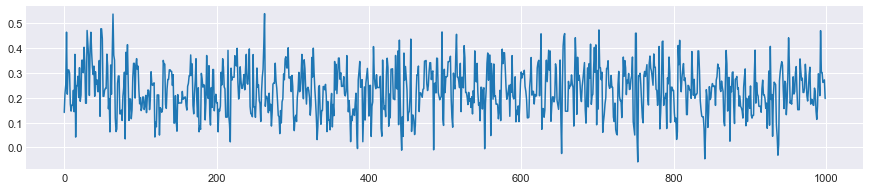

In [19]:
_ = plt.plot(np.arange(len(trace2['mu'])),trace2['mu'], figure = plt.figure(figsize = [15,3]))

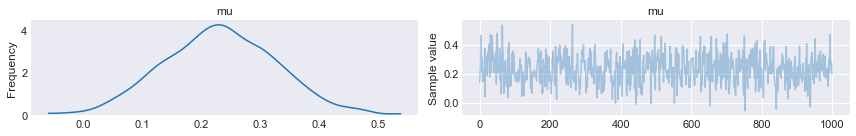

In [20]:
_ = pm.plots.traceplot(trace=trace2, varnames=["mu"])

In [23]:
trace2

<MultiTrace: 1 chains, 1000 iterations, 1 variables>

In [27]:
with pm.Model() as model2:
    mu = pm.Normal('mu', mu=0, sd=1)
    obs = pm.Normal('obs', mu=mu, sd=1, observed=np.random.randn(100))

    trace3 = pm.sample(1000, tune=500, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu]
100%|██████████| 1500/1500 [00:00<00:00, 3198.42it/s]


In [28]:
print(trace3, trace3['mu'].shape)

<MultiTrace: 2 chains, 1000 iterations, 1 variables> (2000,)


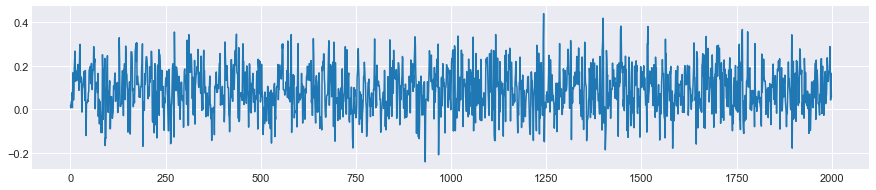

In [29]:
_ = plt.plot(np.arange(len(trace3['mu'])),trace3['mu'], figure = plt.figure(figsize = [15,3]))

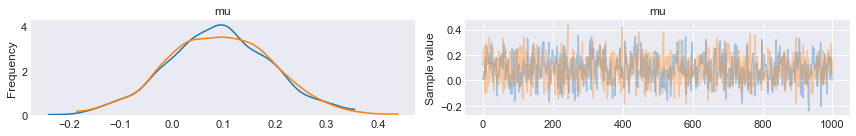

In [30]:
_ = pm.plots.traceplot(trace=trace3, varnames=["mu"])